# 🔹 1️⃣ Load and Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Load dataset
df = pd.read_csv("train.csv")

In [2]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

In [3]:
# Show first few rows
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


# 🔹 2️⃣ Data Cleaning & Preprocessing

In [4]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"Total Duplicates: {duplicates}")

Total Duplicates: 0


In [5]:
# Drop duplicates if any
df = df.drop_duplicates()

In [6]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

Total Missing Values: 0


# 🔹 3️⃣ Feature Selection & Target Variable

In [7]:
# Selecting numerical features and target variable
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                      'num_medications', 'number_outpatient', 'number_emergency', 
                      'number_inpatient', 'number_diagnoses']

X = df[numerical_features]
y = df['readmitted']  # Target variable

# 🔹 4️⃣ Exploratory Data Analysis (EDA)

## 4.1 Summary Statistics

In [8]:
# Display summary statistics
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


## 4.2 Class Distribution of Target Variable

C:\Users\saite\AppData\Local\Temp\ipykernel_21352\1301269550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['readmitted'], palette='Set2')


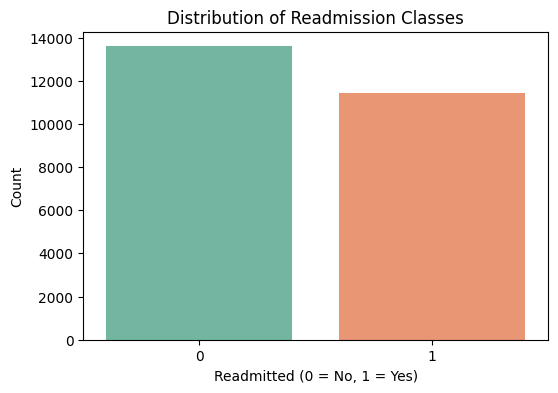

In [9]:
# Plot distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=df['readmitted'], palette='Set2')
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of Readmission Classes")
plt.show()

## 4.3 Correlation Heatmap

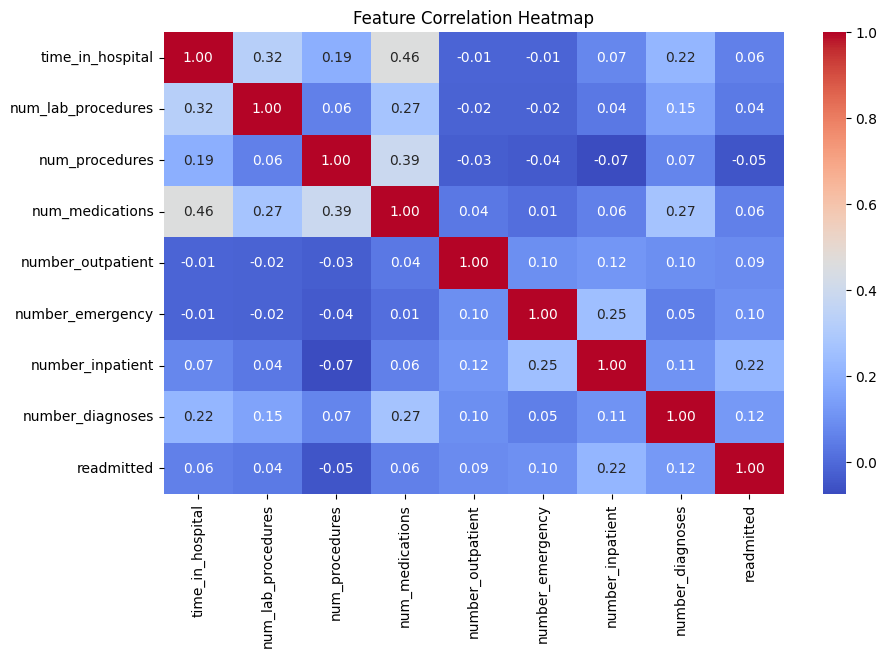

In [10]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features + ['readmitted']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4.4 Feature Distributions

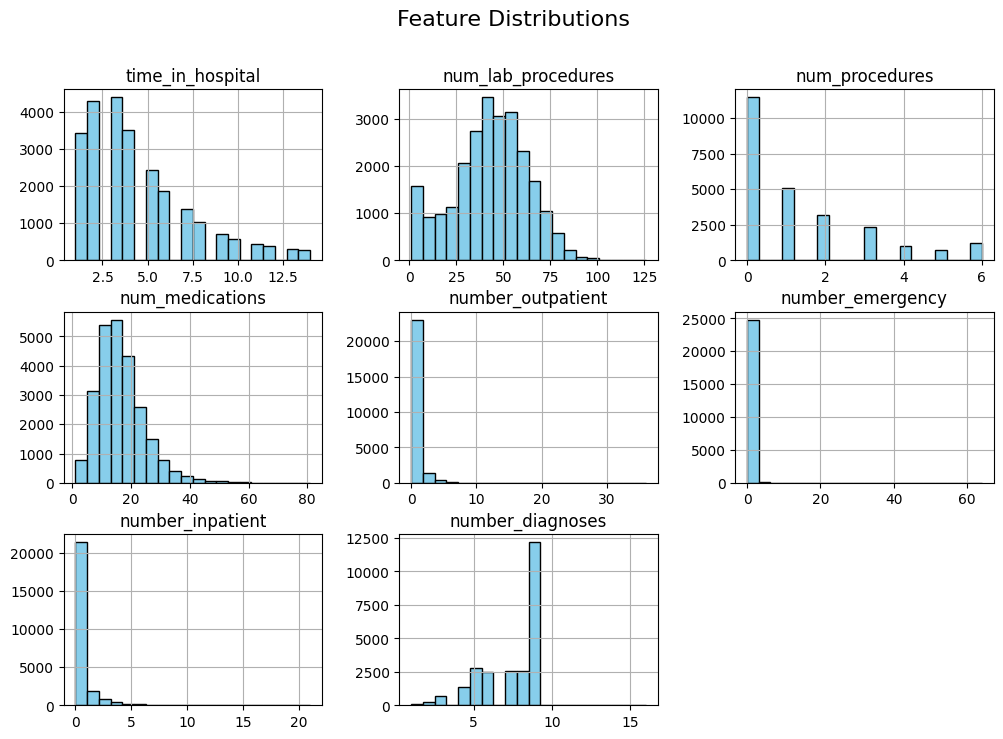

In [11]:
# Plot histograms for numerical features
df[numerical_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 🔹 5️⃣ Split Dataset into Train & Test Sets

In [12]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Check shape of split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 8), (5000, 8), (20000,), (5000,))

# 🔹 6️⃣ Standardize Features

In [13]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 7️⃣ Train & Evaluate KNN Model

In [14]:
# Train KNN model (k=3 as per reference)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict using KNN
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("KNN Classification Report:\n", knn_report)


KNN Accuracy: 0.5640
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61      2718
           1       0.52      0.50      0.51      2282

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



# 🔹 8️⃣ Find Best K Value for KNN


🔹 Training KNN and Finding Best k...

✅ Accuracy: 0.5356del | Epoch 1/19 | k=1... 
✅ Accuracy: 0.5648del | Epoch 2/19 | k=2... 
✅ Accuracy: 0.5640del | Epoch 3/19 | k=3... 
✅ Accuracy: 0.5764del | Epoch 4/19 | k=4... 
✅ Accuracy: 0.5730del | Epoch 5/19 | k=5... 
✅ Accuracy: 0.5792del | Epoch 6/19 | k=6... 
✅ Accuracy: 0.5770del | Epoch 7/19 | k=7... 
✅ Accuracy: 0.5872del | Epoch 8/19 | k=8... 
✅ Accuracy: 0.5844del | Epoch 9/19 | k=9... 
✅ Accuracy: 0.5922del | Epoch 10/19 | k=10... 
✅ Accuracy: 0.5946del | Epoch 11/19 | k=11... 
✅ Accuracy: 0.6030del | Epoch 12/19 | k=12... 
✅ Accuracy: 0.6004del | Epoch 13/19 | k=13... 
✅ Accuracy: 0.6058del | Epoch 14/19 | k=14... 
✅ Accuracy: 0.6016del | Epoch 15/19 | k=15... 
✅ Accuracy: 0.5998del | Epoch 16/19 | k=16... 
✅ Accuracy: 0.5954del | Epoch 17/19 | k=17... 
✅ Accuracy: 0.6020del | Epoch 18/19 | k=18... 
✅ Accuracy: 0.5982del | Epoch 19/19 | k=19... 

⏳ KNN Training Completed in 28.15 seconds!


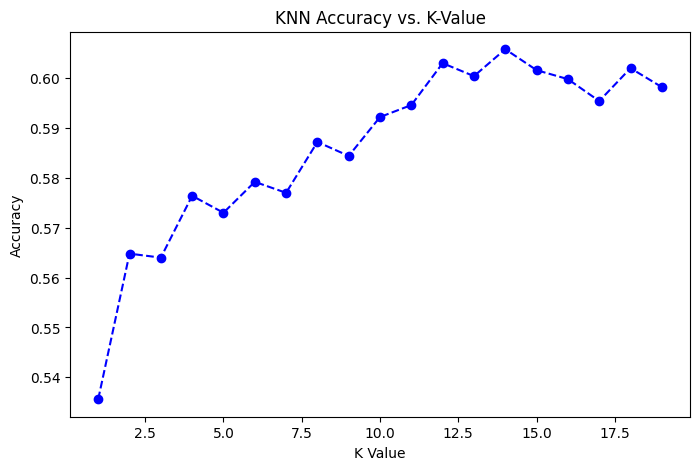

🏆 Best K Value: 14 with Accuracy: 0.6058


In [15]:
# Finding optimal k-value
accuracy_scores = []
k_values = range(1, 20)

print("\n🔹 Training KNN and Finding Best k...\n")

# Start time
start_time = time.time()

for i, k in enumerate(k_values):
    print(f"🔄 Training KNN Model | Epoch {i+1}/{len(k_values)} | k={k}...", end=" ")

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    print(f"✅ Accuracy: {acc:.4f}")

# End time
end_time = time.time()
elapsed_time_knn = end_time - start_time
print(f"\n⏳ KNN Training Completed in {elapsed_time_knn:.2f} seconds!")

# Plot Accuracy vs K-value
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K-Value")
plt.show()

# Best K value
best_k = k_values[np.argmax(accuracy_scores)]
best_knn_acc = max(accuracy_scores)
print(f"🏆 Best K Value: {best_k} with Accuracy: {best_knn_acc:.4f}")

# 🔹 9️⃣ Train & Evaluate SVM Model

In [16]:
# Train SVM model with Gaussian Kernel
svm = SVC(kernel='rbf')  # Gaussian (RBF) kernel
svm.fit(X_train_scaled, y_train)

# Predict using SVM
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Classification Report:\n", svm_report)


SVM Accuracy: 0.6184
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68      2718
           1       0.61      0.46      0.52      2282

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.60      5000
weighted avg       0.62      0.62      0.61      5000



# 🔹 🔟 Tune SVM Hyperparameters

In [17]:
# Define parameter grid (fewer combinations)
param_dist = {
    'C': np.logspace(-1, 1, 5),  # Reduced range
    'gamma': np.logspace(-2, 1, 5),  # Reduced range
    'kernel': ['rbf']
}

# Start time
start_time = time.time()

print("\n🔹 Running Faster SVM Hyperparameter Tuning...")

# Perform Randomized Search (faster than Grid Search)
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# End time
end_time = time.time()
elapsed_time_svm = end_time - start_time
print(f"\n⏳ SVM Hyperparameter Tuning Completed in {elapsed_time_svm:.2f} seconds!")

# Best Parameters
best_svm_params = random_search.best_params_
print(f"🏆 Best SVM Parameters: {best_svm_params}")

# Evaluate best model
best_svm = random_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)

print(f"✅ Best Tuned SVM Accuracy: {best_svm_accuracy:.4f}")

# Check Improvement
baseline_svm = SVC(kernel='rbf').fit(X_train_scaled, y_train).score(X_test_scaled, y_test)
improvement = best_svm_accuracy - baseline_svm
print(f"📊 Improvement Over Baseline SVM: {improvement:.4f}")



🔹 Running Faster SVM Hyperparameter Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

⏳ SVM Hyperparameter Tuning Completed in 483.74 seconds!
🏆 Best SVM Parameters: {'kernel': 'rbf', 'gamma': np.float64(0.05623413251903491), 'C': np.float64(1.0)}
✅ Best Tuned SVM Accuracy: 0.6118
📊 Improvement Over Baseline SVM: -0.0066


# 🔹 1️⃣1️⃣ Compare Model Performance

In [18]:
# Compare results
print(f"Model Performance Comparison:\n")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Tuned SVM Accuracy: {best_svm_accuracy:.4f}")

if best_svm_accuracy > knn_accuracy:
    print("\nSVM performs better!")
else:
    print("\nKNN performs better!")

Model Performance Comparison:

KNN Accuracy: 0.5640
SVM Accuracy: 0.6184
Tuned SVM Accuracy: 0.6118

SVM performs better!


# 📌 Visualizing Model Performance: KNN vs SVM
## 1️⃣2️⃣ Compare Accuracy Using a Bar Chart

C:\Users\saite\AppData\Local\Temp\ipykernel_21352\1229608677.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


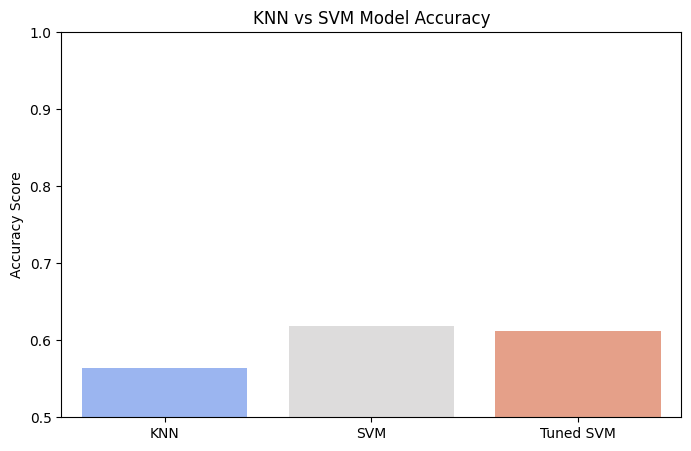

In [19]:
# Model names and accuracy scores
models = ["KNN", "SVM", "Tuned SVM"]
accuracies = [knn_accuracy, svm_accuracy, best_svm_accuracy]

# Bar plot for accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0.5, 1.0)  # Set y-axis range
plt.ylabel("Accuracy Score")
plt.title("KNN vs SVM Model Accuracy")
plt.show()

## 1️⃣3️⃣  Visualize Classification Reports

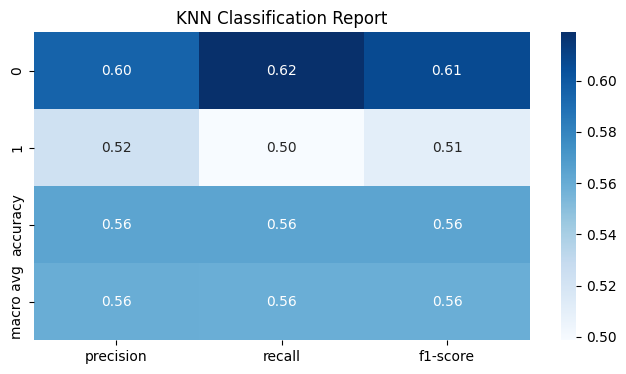

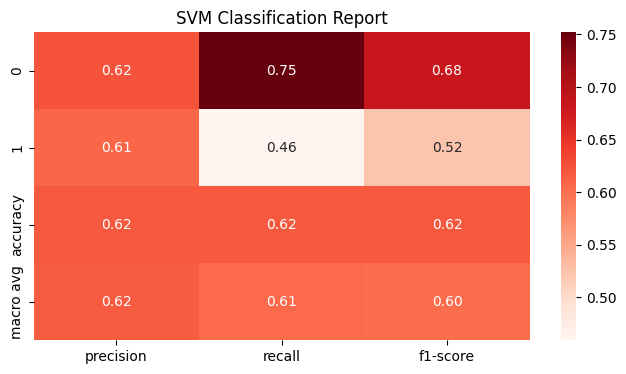

In [20]:
# Function to convert classification report to DataFrame
def get_classification_df(report):
    report_dict = classification_report(y_test, report, output_dict=True)
    return pd.DataFrame(report_dict).transpose()

# Convert classification reports to DataFrames
knn_report_df = get_classification_df(y_pred_knn)
svm_report_df = get_classification_df(y_pred_svm)

# Display KNN classification report as a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(knn_report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("KNN Classification Report")
plt.show()

# Display SVM classification report as a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(svm_report_df.iloc[:-1, :-1], annot=True, cmap="Reds", fmt=".2f")
plt.title("SVM Classification Report")
plt.show()

## 1️⃣4️⃣ Confusion Matrix Comparison

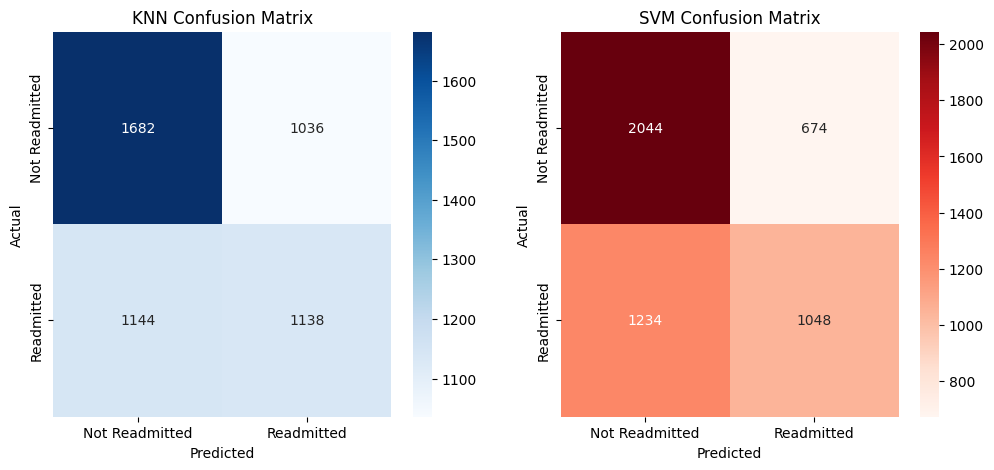

In [21]:
# Compute confusion matrices
knn_cm = confusion_matrix(y_test, y_pred_knn)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices for KNN
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Readmitted", "Readmitted"], yticklabels=["Not Readmitted", "Readmitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")

# Plot confusion matrices for SVM
plt.subplot(1,2,2)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Readmitted", "Readmitted"], yticklabels=["Not Readmitted", "Readmitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")

plt.show()

## 1️⃣5️⃣ ROC Curve Comparison

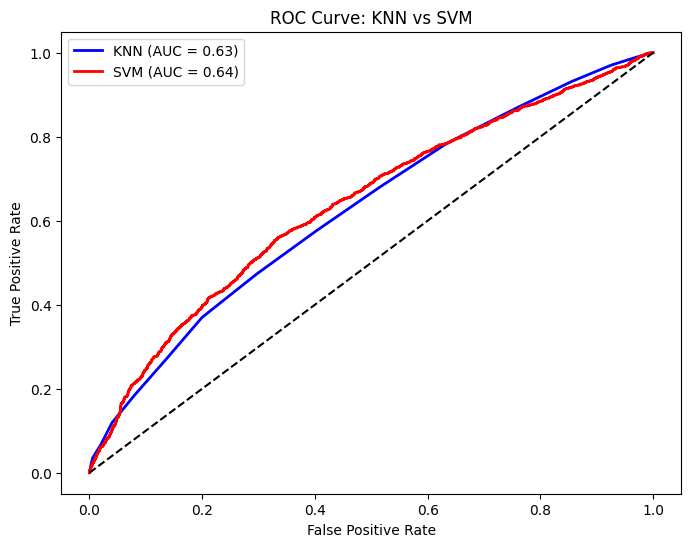

In [22]:
# Compute ROC curve for both models
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.decision_function(X_test_scaled))

# Compute AUC scores
auc_knn = auc(fpr_knn, tpr_knn)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: KNN vs SVM")
plt.legend()
plt.show()

# 1️⃣6️⃣ User Input Testing

In [24]:

# Function to take user input and predict readmission with decision logic
def predict_user_input():
    print("\n🔹 Enter the following details to predict hospital readmission:")

    # Taking user input for numerical features
    time_in_hospital = int(input("Time in hospital (days): "))
    num_lab_procedures = int(input("Number of lab procedures: "))
    num_procedures = int(input("Number of procedures: "))
    num_medications = int(input("Number of medications: "))
    number_outpatient = int(input("Number of outpatient visits: "))
    number_emergency = int(input("Number of emergency visits: "))
    number_inpatient = int(input("Number of inpatient visits: "))
    number_diagnoses = int(input("Number of diagnoses: "))

    # Creating user input array
    user_data = np.array([[time_in_hospital, num_lab_procedures, num_procedures,
                            num_medications, number_outpatient, number_emergency, 
                            number_inpatient, number_diagnoses]])

    # Standardize the user input using the same scaler
    user_data_scaled = scaler.transform(user_data)

    # Predict using KNN
    knn_pred = knn.predict(user_data_scaled)[0]
    knn_confidence = knn.predict_proba(user_data_scaled)[0][1]  # Probability of "Readmitted"

    # Predict using SVM
    svm_pred = best_svm.predict(user_data_scaled)[0]
    svm_confidence = best_svm.decision_function(user_data_scaled)[0]  # Decision function score

    # Print individual predictions
    print("\n🔹 **Prediction Results** 🔹")
    print(f"KNN Model Prediction: {'Readmitted' if knn_pred == 1 else 'Not Readmitted'} (Confidence: {knn_confidence:.4f})")
    print(f"SVM Model Prediction: {'Readmitted' if svm_pred == 1 else 'Not Readmitted'} (Confidence Score: {svm_confidence:.4f})")

    # Print model accuracies
    print("\n📊 **Model Accuracy Scores**")
    print(f"KNN Model Accuracy: {knn_accuracy:.4f}")
    print(f"SVM Model Accuracy: {best_svm_accuracy:.4f}")

    # Final decision logic based on model accuracy and confidence
    if best_svm_accuracy > knn_accuracy:
        final_prediction = svm_pred
        final_model = "SVM"
    else:
        final_prediction = knn_pred
        final_model = "KNN"

    # Print the final decision
    print("\n🔹 **Final Decision (Based on Accuracy & Confidence):**")
    print(f"🏆 **Final Prediction: {'Readmitted' if final_prediction == 1 else 'Not Readmitted'}** (Using {final_model}) ✅")

# Call function to test user input
predict_user_input()



🔹 Enter the following details to predict hospital readmission:


Time in hospital (days):  40
Number of lab procedures:  10
Number of procedures:  5
Number of medications:  20
Number of outpatient visits:  5
Number of emergency visits:  2
Number of inpatient visits:  1
Number of diagnoses:  10


C:\Users\saite\OneDrive - University of Central Missouri\Documents\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



🔹 **Prediction Results** 🔹
KNN Model Prediction: Readmitted (Confidence: 0.6316)
SVM Model Prediction: Readmitted (Confidence Score: 0.2956)

📊 **Model Accuracy Scores**
KNN Model Accuracy: 0.5640
SVM Model Accuracy: 0.6118

🔹 **Final Decision (Based on Accuracy & Confidence):**
🏆 **Final Prediction: Readmitted** (Using SVM) ✅
